# **Parte 2: Preprocesamiento de Datos**

# **Parte 3: Benchmarking de Técnicas de Machine Learning**

**Selección de Modelos:**

Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).
Utilizar validación cruzada para evaluar el rendimiento de los modelos.

In [42]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,  classification_report, confusion_matrix, roc_curve, roc_auc_score

In [27]:
# Cargamos el dataset y convertimos las columnas de tipo object a category

path = ('../data/retail_sales_dataset.csv')
df = pd.read_csv(path)

# Añadimos una nueva coluna de clasificacion
def clasificar_ventas(amount):
    if amount > 150:
        return 'Alta'
    elif amount > 50:
        return 'Media'
    else:
        return 'Baja'

df['Clasificación'] = df['Total Amount'].apply(clasificar_ventas)

In [28]:
# Convertir los tipos de datos
df['Date'] = pd.to_datetime(df['Date'])  
df['Customer ID'] = df['Customer ID'].astype('string') 
df['Gender'] = df['Gender'].astype('category')  
df['Product Category'] = df['Product Category'].astype('category')
df['Clasificación'] = df['Clasificación'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   string        
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Clasificación     1000 non-null   category      
dtypes: category(3), datetime64[ns](1), int64(5), string(1)
memory usage: 58.1 KB


In [29]:
# Preprocesamiento de los datos 

numerical_transformer = Pipeline(steps=[ 
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing  categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unseen categories
])

In [30]:
# Preprocesamiento de los datos, usando ColumnTransformer

numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
categorical_cols = ['Gender', 'Product Category', 'Clasificación']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [31]:
# Aplicamos el preprocesamiento a los datos con el Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [32]:
# Aplicamos el preprocesamiento a los datos
X_transformed = pipeline.fit_transform(df)
X_transformed

array([[-0.54056476,  0.42926498, -0.68512265, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12559156, -0.45399629,  1.68846418, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.62948884, -1.33725757, -0.7906154 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.34497661,  1.31252625, -0.81698859, ...,  0.        ,
         0.        ,  1.        ],
       [-0.39430806,  0.42926498, -0.68512265, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.41010379,  1.31252625, -0.7906154 , ...,  0.        ,
         0.        ,  1.        ]])

## **Parte 4: Análisis de Métricas**

**Informe de Clasificación:**

* Generar un informe de clasificación para los modelos evaluados.

* Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.

* Curva ROC y AUC:*

Crear y visualizar la curva ROC para los modelos de clasificación binaria.
Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

In [33]:
# Prepare your feature matrix X and target variable y
X = df.drop(columns=['Transaction ID', 'Customer ID', 'Date'])  
y = df['Clasificación']  # The target variable for classification

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

# Fit and transform the features
X_transformed = pipeline.fit_transform(X)

In [34]:
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

In [35]:
# List the classifiers to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}


**Comparación de Modelos:**

* Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

* Seleccionar el mejor modelo basado en las métricas obtenidas.

In [36]:
# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

# Lista de modelos 
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

In [37]:
# Evaluamos el modelo
results = {}
for name, model in models.items():
    # Validate the model using cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  
    results[name] = cv_scores



c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 12
[LightGBM] [Info] Start training from score -0.808979
[LightGBM] [Info] Start training from score -1.471036
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [38]:
# Imprimimos los resultados de cross-validation
for name, scores in results.items():
    print(f"{name}: Mean CV Accuracy: {scores.mean():.3f} +/- {scores.std():.3f}")



Logistic Regression: Mean CV Accuracy: 1.000 +/- 0.000
KNN: Mean CV Accuracy: 0.996 +/- 0.005
Decision Tree: Mean CV Accuracy: 1.000 +/- 0.000
Random Forest: Mean CV Accuracy: 1.000 +/- 0.000
XGBoost: Mean CV Accuracy: 1.000 +/- 0.000
LightGBM: Mean CV Accuracy: 1.000 +/- 0.000


In [39]:
# Entrenamos cada modelo
for name, model in models.items():
    # Entrenamos el modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)

    # Calculamos las metricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC AUC para multiclases 
    if hasattr(model, "predict_proba"):  # Ensure the model can predict probabilities
        y_pred_proba = model.predict_proba(X_test)  # This returns probabilities for all classes
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Use OvR for multi-class ROC AUC
    else:
        roc_auc = "N/A"

    # Imprimimos las metricas
    print(f"{name}: Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc}")

Logistic Regression: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, ROC-AUC: 1.0
KNN: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, ROC-AUC: 1.0
Decision Tree: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, ROC-AUC: 1.0
Random Forest: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, ROC-AUC: 1.0
XGBoost: Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, ROC-AUC: 1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12
[LightGBM] [Info] Start training from score -0.806876
[LightGBM] [Info] Start training from score -1.475126
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **Parte 4: Análisis de Métricas**

**Informe de Clasificación:**

* Generar un informe de clasificación para los modelos evaluados.

* Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.

**Curva ROC y AUC:**
* Crear y visualizar la curva ROC para los modelos de clasificación binaria.

* Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.


Informe de clasificación para Logistic Regression:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       101
        Baja       1.00      1.00      1.00        34
       Media       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



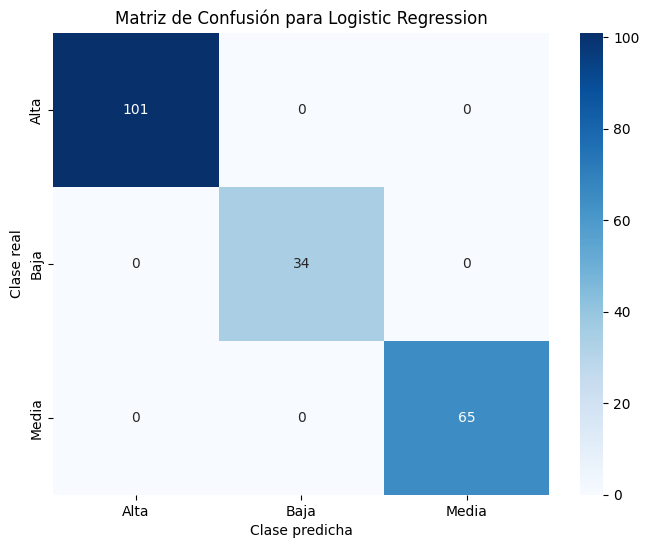

Curvas ROC y AUC no se pueden calcular para el modelo Logistic Regression ya que no es binario.

Informe de clasificación para KNN:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       101
        Baja       1.00      1.00      1.00        34
       Media       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



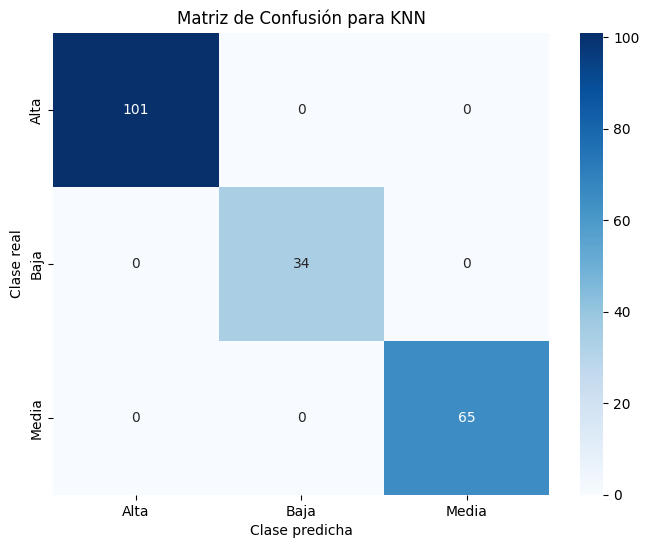

Curvas ROC y AUC no se pueden calcular para el modelo KNN ya que no es binario.

Informe de clasificación para Decision Tree:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       101
        Baja       1.00      1.00      1.00        34
       Media       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



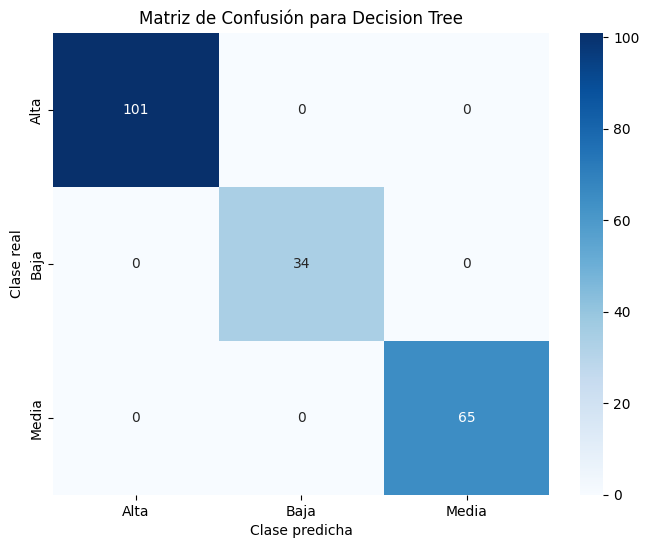

Curvas ROC y AUC no se pueden calcular para el modelo Decision Tree ya que no es binario.

Informe de clasificación para Random Forest:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       101
        Baja       1.00      1.00      1.00        34
       Media       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



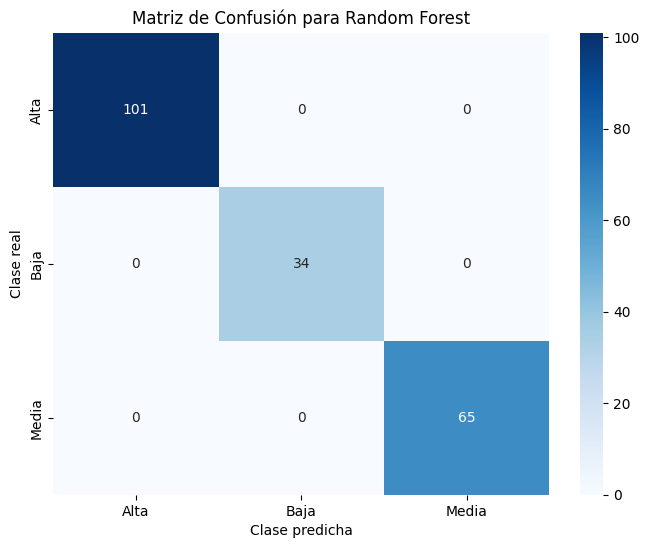

Curvas ROC y AUC no se pueden calcular para el modelo Random Forest ya que no es binario.

Informe de clasificación para XGBoost:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       101
        Baja       1.00      1.00      1.00        34
       Media       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



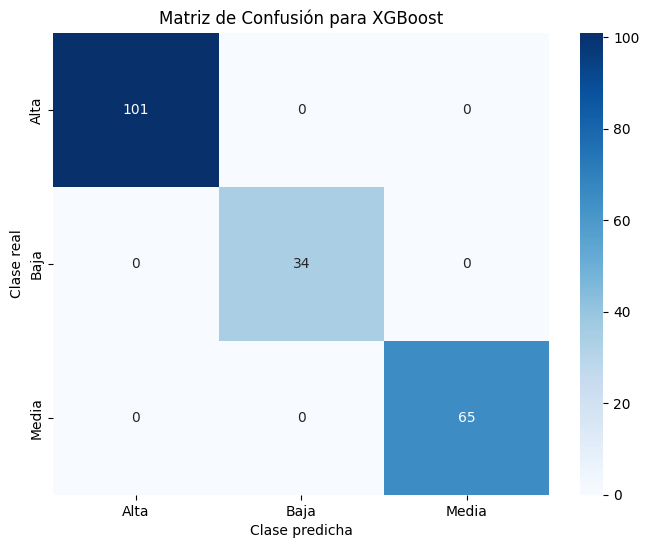

Curvas ROC y AUC no se pueden calcular para el modelo XGBoost ya que no es binario.

Informe de clasificación para LightGBM:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       101
        Baja       1.00      1.00      1.00        34
       Media       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



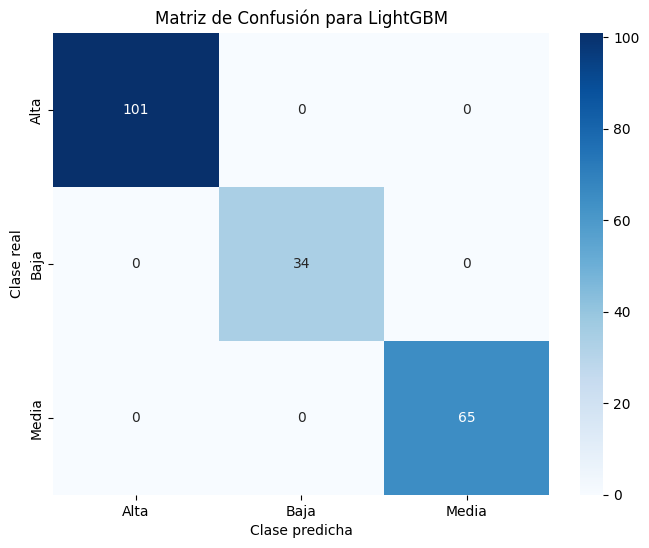

Curvas ROC y AUC no se pueden calcular para el modelo LightGBM ya que no es binario.


In [43]:
# Evaluar cada modelo
for name, model in models.items():
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Generar el informe de clasificación
    print(f"\nInforme de clasificación para {name}:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.title(f'Matriz de Confusión para {name}')
    plt.show()
    
    # Curva ROC y AUC
    if hasattr(model, "predict_proba"):  # Asegurarse de que el modelo puede predecir probabilidades
        y_pred_proba = model.predict_proba(X_test)

        # Asumamos que tienes un problema binario con clases 0 y 1
        if len(label_encoder.classes_) == 2:  # Asegúrate de que es binario
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)  # Pos_label es la clase positiva
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
            
            # Trazar la curva ROC
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
            plt.plot([0, 1], [0, 1], color='red', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.xlabel('Tasa de falsos positivos')
            plt.ylabel('Tasa de verdaderos positivos')
            plt.title(f'Curva ROC para {name}')
            plt.legend(loc="lower right")
            plt.show()
        else:
            print(f"Curvas ROC y AUC no se pueden calcular para el modelo {name} ya que no es binario.")